<a href="https://colab.research.google.com/github/SSimmondsR/AdvancedDataQueries-SQL/blob/main/Grupo_4_An%C3%A1lisis_exploratorio_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src = "https://universidadean.edu.co/sites/default/files/noticias/galeria/Logo-Universidad-Ean-fondo-negro-Galeria_1.jpg" alt = "Encabezado MLDS" width = "30%">  </img>


#**Entendimiento de los datos**
---

El desarrollo de las actividades de esta guía le permitirá poner en práctica herramientas de organización y visualización de datos. A través de la construcción de diferentes gráficas y el cálculo de medidas descriptivas como la media, la mediana, la moda, la varianza y la desviación estándar, será posible obtener una visión general de las características principales de los datos, permitiendo identificar patrones y tendencias.

Se trabajará sobre la base de datos *Titanic*, que contiene datos relacionados con los pasajeros y tripulantes a bordo del RMS Titanic, un transatlántico británico que naufragó en el año 1912.


| Variable | Definición	| Valores |
| --- | --- | --- |
| survived \| alive | 	Sobreviviente  | 	[0\|no] = No, [1\|yes] = Sí |
| pclass \| class	| Clase del tiquete | 	1 = [1\|First], 2 = [2\|Second], 3 = [3\|Third]
| sex 	| Sexo 	| 'male', 'female' |
| Age |	Edad en años 	| |
| sibsp |	Número de hermanos / cónyuge abordo del Titanic 	| |
| parch |	Número de padres / hijos abordo del Titanic 	| |
| fare 	| Costo del ticket | |
| embarked |	Puerto de embarque |	C = Cherbourg, Q = Queenstown, S = Southampton |
| who |	Si es hombre, mujer o niño. | 'man', 'woman', 'child'  |
| adult_male 	| Si es un hombre mayor de edad. | True, False	|
| deck |	Identificación de la cubierta/cabina.| 'A', 'B', 'C', 'D', 'E', 'F', 'G' |
| alone |	Si había embarcado solo.| True, False |

Ejecute la siguiente celda para importar las librerías necesarias. Si se requiere de librerías adicionales puede anexarlas a la celda.

In [ ]:
# Importar librerías (EJECUTE ESTA CELDA)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

colorslist = ['#2899C3','#E09A0D']

In [ ]:
#VERIFICACIÓN DE VERSIONES
!python --version
print('Pandas', pd.__version__)
print('NumPy', np.__version__)
print('Seaborn', sns.__version__)
print('Matplotlib', mpl.__version__)

Python 3.10.12
Pandas 2.1.4
NumPy 1.26.4
Seaborn 0.13.1
Matplotlib 3.7.1


Este material fue realizado con las siguientes versiones:

- Python 3.10.12

- Pandas: 2.0.3

- Numpy: 1.25.2

- Seaborn: 0.13.1

- Matplotlib: 3.7.1

Para cargar los datos ejecute la siguiente celda.

In [ ]:
#df1 = sns.load_dataset('titanic', data_home='./')
df1 = sns.load_dataset("titanic")
df1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


**Nombres de los integrantes del grupo (Grupo 4)**

---

1. Santiago Simmonds
2. David Hernando Henao
3. Jose David Mariño
4. German Alonso Rodriguez


##**1. Entendimiento de los datos**
---
> Haga una exploración de las variables con el método **`.info()`**.   
En esta parte se requiere hacer una revisión de la base de datos donde se muestre entre otras cosas:  

1.  Número total de variables que contiene la base de datos.  

2. Escribir las variables que tienen datos faltantes, además, proporcionar el porcentaje total de valores faltantes en la base de datos.
3. Clasificar las variables en cualitativas y numéricas.  

4. Consultar y proponer una metodología de *imputación* de datos para la variable *age*, indique la conveniencia o no de aplicar una metodología de este tipo.  

**`Nota:`** Sobre el punto 4, no es necesario relizar el proceso de imputación, solo explicar la propuesta de imputación.


In [ ]:
# Escriba aquí el código para realizar en análisis solicitado
print(f"1. Número total de variables: {df1.shape[1]}\n")
vn = df1.isnull().sum()
print(f"2.1 Cantidad de datos nulos por variable: \n\n{np.round(vn[vn>0],2)}\n")
df_null_porc = df1.isnull().sum() / df1.shape[0] * 100
#print(f"2.2. Porcentaje de datos nulos por variable: \n\n{df_null_porc}")
print(f"2.2. Porcentaje de datos nulos por variable: \n\n{np.round(vn[vn>0]/ df1.shape[0] * 100,2)}")

1. Número total de variables: 15

2.1 Cantidad de datos nulos por variable: 

age            177
embarked         2
deck           688
embark_town      2
dtype: int64

2.2. Porcentaje de datos nulos por variable: 

age            19.87
embarked        0.22
deck           77.22
embark_town     0.22
dtype: float64


3. Clasificar las variables


| Variable | Definición	| Tipo de variable |
| --- | --- | --- |
| survived \| alive | 	Sobreviviente  | 	Cualitativo |
| pclass \| class	| Clase del tiquete | 	Cualitativo
| sex 	| Sexo 	| Cualitativo |
| Age |	Edad en años 	|   Cuantitativo |
| sibsp |	Número de hermanos / cónyuge abordo del Titanic 	| Cuantitativo|
| parch |	Número de padres / hijos abordo del Titanic 	| Cuantiativo |
| fare 	| Costo del ticket | Cuantitativo |
| embarked |	Puerto de embarque |	Cualitativo |
| who |	Si es hombre, mujer o niño. | Cualitativo |
| adult_male 	| Si es un hombre mayor de edad. | Cualitativo	|
| deck |	Identificación de la cubierta/cabina.| Cualitativo |
| alone |	Si había embarcado solo.| Cualitativo |

4. Metodologias de imputación de datos:

**Técnicas de imputación simple**
Las técnicas simples de imputación son métodos tradicionales y conocidos para el tratamiento de datos faltantes. Algunas de las técnicas más comunes son:
- Imputación por la media
- Imputación por la mediana
- Imputación por regresión
- Imputación hot-deck

**Técnicas de imputación multiple** La imputación múltiple es un enfoque más avanzado que genera múltiples conjuntos de datos completos, cada uno con diferentes valores imputados. Algunos pasos clave son:

- Generar M (≥ 2) conjuntos de datos completos, reemplazando cada valor faltante por M valores plausibles.

- Analizar cada uno de los M conjuntos de datos completos por separado usando métodos estándar.

- Combinar los resultados de los M análisis usando reglas especiales para obtener estimaciones e inferencias finales que reflejen la incertidumbre debido a los valores faltantes

*Para la variable "Age", según los resultados del punto 6, se observa un sesgo hacia la derecha en su distribución, lo que indica que las edades tienden a concentrarse en valores más bajos. Además, se ha identificado que esta variable presenta dependencia con otras variables de la base de datos, como "adult_male" y "parch".*

*De las 891 entradas disponibles en la base de datos, 177 observaciones no tienen valores registrados en la variable "Age", lo que representa aproximadamente el 20% de los datos. Esta proporción de datos faltantes es considerable y podría afectar los resultados si se utilizan métodos de imputación inadecuados.*

*Dadas estas circunstancias, se recomienda explorar técnicas más avanzadas para la imputación de valores faltantes, tales como la imputación múltiple o el uso de modelos predictivos que tomen en cuenta las relaciones entre "Age" y las demás variables dependientes, para obtener una estimación más precisa y evitar sesgos en los análisis posteriores.*



## **2. Distribución de la tarifa**
---

1. Represente gráficamente la distribución de la tarifa del tiquete de ingreso de los pasajeros a bordo del *Titanic* por medio de un **histograma**.
2. Realice un análisis del histograma obtenido haciendo comentarios sobre la forma, dispersión de los datos y existencia de datos atípicos.

**`Nota:`** Tenga en cuenta que la gráfica debe tener como mínimo los siguientes elementos:  
- Título o encabezado
- Figura o gráfica
- Fuente de los datos
- Leyendas (si se requiere)  


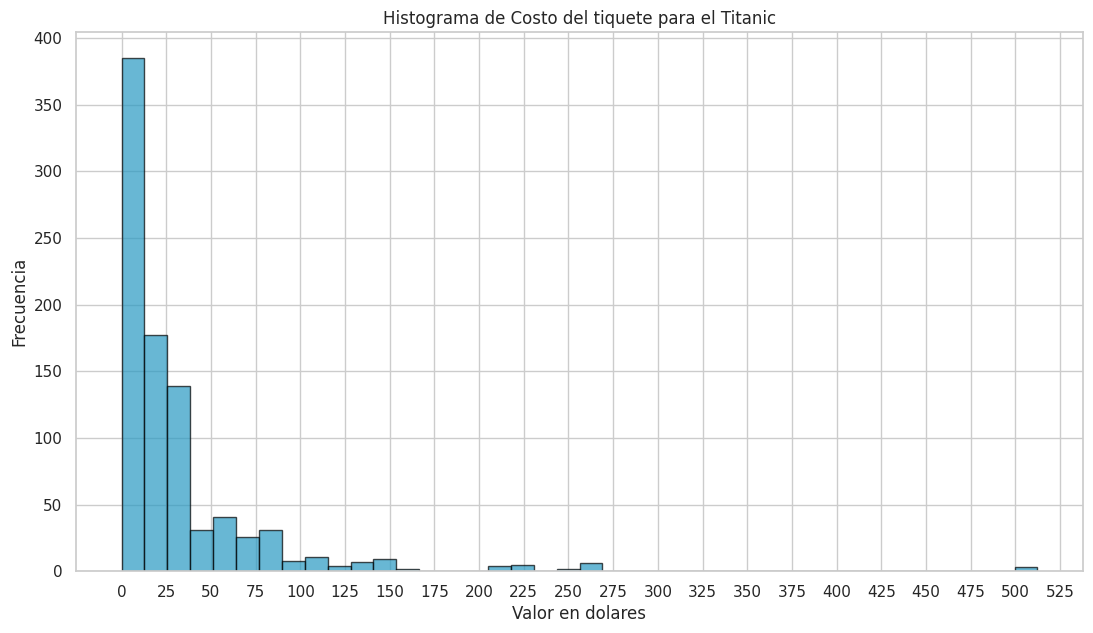

In [ ]:
# Escriba aquí el código para realizar la gráfica solicitada

# Crear el histograma
plt.figure(figsize=(13, 7))
plt.hist(df1['fare'], bins=40, color=colorslist[0], edgecolor='black', alpha=0.7)

ticks = np.arange(df1['fare'].min(), df1['fare'].max()+25, 25)
plt.xticks(ticks)

# Agregar etiquetas y título
plt.title('Histograma de Costo del tiquete para el Titanic')
plt.xlabel('Valor en dolares')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()


Del histograma generado para ver la frecuencia del valor de los tickets que fueron comprados en el titanic, se evidencia lo siguiente:

1. Los tickets más economicos que se encontraban en un rango de 0-25 USD fueron los más vendidos por alrededor de unas 550 personas, seguido por los tickets de 25-50 USD por aproximadamente 180 personas.
2. Los tickets por encima de 200 dolares  fueron comprados por muy pocas personas, aproxidamante 20 personas adquirieron estos tiquets.
3. Existe un valor atípico, ya que existe un tiquet por 500 USD, dando un salto en el costo del tique de más de 200 USD.

##**3. Proporción de sobrevivientes**
---

1. Represente gráficamente la variable *survived* de la base de datos por medio de un **diagrama de sectores**.
2. Realice un análisis del diagrama de sectores señalando la propoción de pasajeros que sobrevivieron y los que no lo hicieron.

1. 



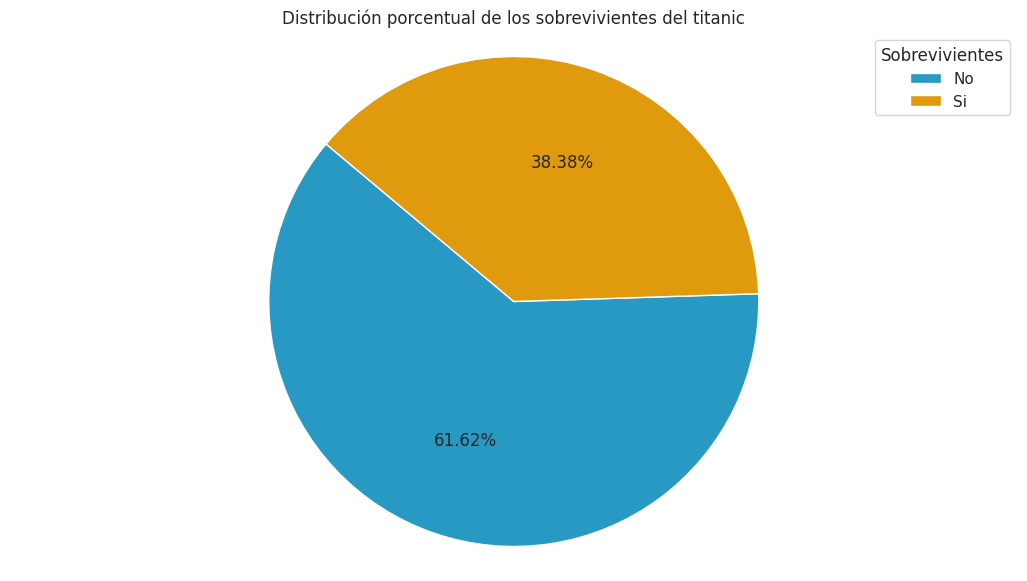

In [ ]:
# Escriba aquí el código para realizar la gráfica solicitada

plt.figure(figsize=(13, 7))

# Cambiar valor 0 a "No", 1 a "Si"
survived_si_no = df1['survived'].map({0: 'No', 1: 'Si'})

# Contar la cantidad de pasajeros por puerto de embarque
survived_counts = survived_si_no.value_counts()

# Crear el gráfico de sectores
plt.pie(survived_counts, autopct='%1.2f%%', shadow=False, startangle=140, colors=colorslist)

# Asegurar que el gráfico se vea como un círculo
plt.axis('equal')

# Añadir una leyenda
plt.legend(survived_counts.index, title="Sobrevivientes", loc="best")  # 'best' colocará la leyenda en la mejor posición

# Mostrar el gráfico
print("1. \n")
plt.title('Distribución porcentual de los sobrevivientes del titanic')
plt.show()


2. A partir del grafico de diagrama de sectores de los sobrevivientes del titanic, más de la mitad de sus pasajeros NO sobrevivieron al accidente del Titanic (61,6 %), solo el 38,4 % lograron sobrevivir.

## **4. Distribución de pasajeros y tripulación**
---
Realice una exploración la distribución de los pasajeros y tripulación, distinguiendo por género y edad, y analizando la relación que estas variables tuvieron con su supervivencia.  

1. Explorar la distribución de edades para mujeres y hombres en dos gráficas. Se deberá representar mediante dos **histogramas** la edad de los pasajeros en dos gráficas en la misma figura, usando para discriminar las distribuciones la variable categórica sexo (**`sex`**)

> * Los diagramas pueden ser construidos como un **`FacetGrid`** de la librería *Seaborn*.

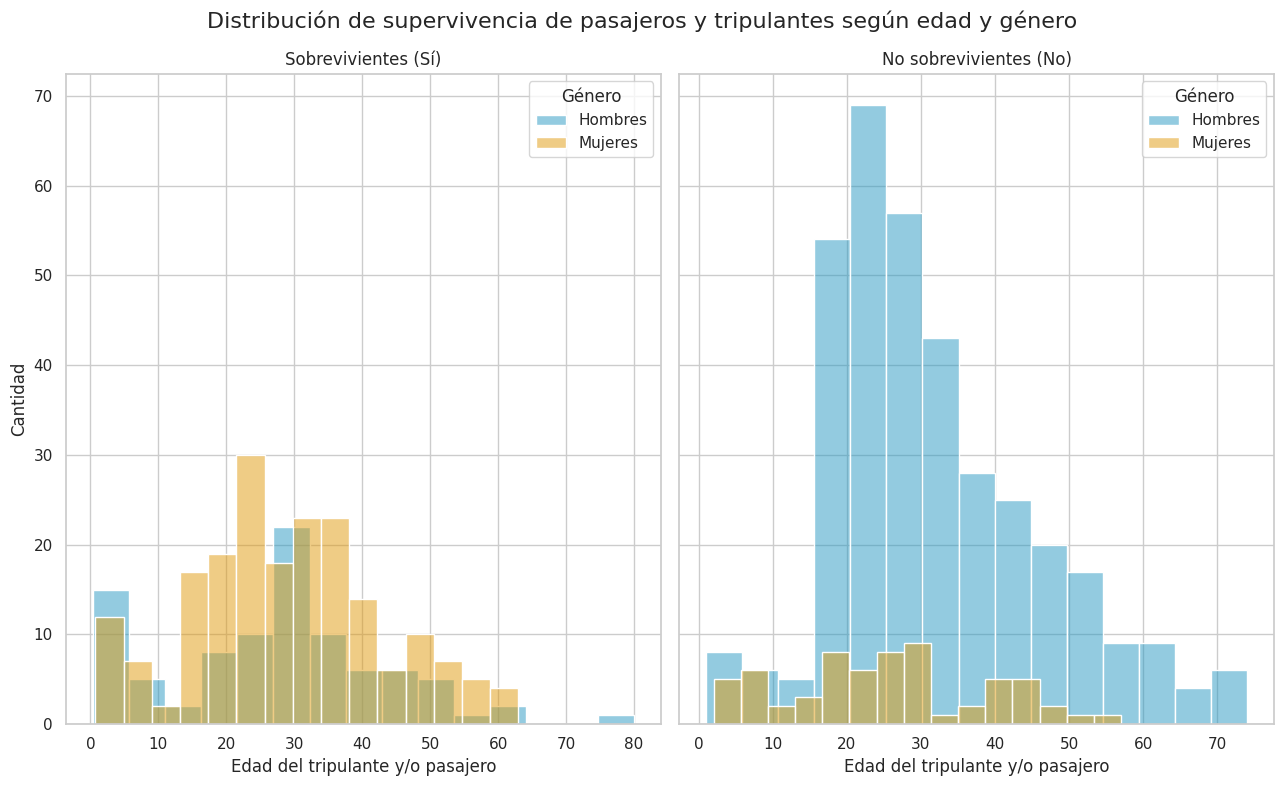

In [ ]:
sns.set(style="whitegrid")
#plt.title('Distribución de pasajeros y tripulantes de su supervivencia según y genero ')

# Crear una figura con dos gráficos (uno para sobrevivientes y otro para no sobrevivientes)
fig, axes = plt.subplots(1, 2, figsize=(13, 8), sharey=True)

# Filtrar por los que sobrevivieron (Survived == 1) y no sobrevivieron (Survived == 0)
df_survived = df1[df1['survived'] == 1]
df_not_survived = df1[df1['survived'] == 0]

# Crear los histogramas para los sobrevivientes
sns.histplot(df_survived[df_survived['sex'] == 'male']['age'].dropna(),
             color=colorslist[0], label='Hombres', kde=False, bins=15, ax=axes[0], alpha=0.5)
sns.histplot(df_survived[df_survived['sex'] == 'female']['age'].dropna(),
             color=colorslist[1], label='Mujeres', kde=False, bins=15, ax=axes[0], alpha=0.5)

# Etiquetas y título para el gráfico de sobrevivientes
axes[0].set_title('Sobrevivientes (Sí)')
axes[0].set_xlabel('Edad del tripulante y/o pasajero')
axes[0].set_ylabel('Cantidad')
axes[0].legend(title='Género')

# Crear los histogramas para los que no sobrevivieron
sns.histplot(df_not_survived[df_not_survived['sex'] == 'male']['age'].dropna(),
             color=colorslist[0], label='Hombres', kde=False, bins=15, ax=axes[1], alpha=0.5)
sns.histplot(df_not_survived[df_not_survived['sex'] == 'female']['age'].dropna(),
             color=colorslist[1], label='Mujeres', kde=False, bins=15, ax=axes[1], alpha=0.5)

# Etiquetas y título para el gráfico de no sobrevivientes
fig.suptitle('Distribución de supervivencia de pasajeros y tripulantes según edad y género', fontsize=16)
axes[1].set_title('No sobrevivientes (No)')
axes[1].set_xlabel('Edad del tripulante y/o pasajero')
axes[1].legend(title='Género')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

* Se observa que en el histograma de sobrevivientes por edad y sexo, las mujeres representan mayor cantidad de sobrevivientes, con concentración en las edades entre los 15 y 40 años.

* Se observa que en el histograma de no sobrevivientes por edad y sexo, los hombres representan mayor cantidad de no sobrevivientes, con concentración en las edades entre los 18 y 55 años.

A partir de los dos histogramas podemos concluir que en estos escenarios la política de emergencia prioriza la vida de mujeres y niños, por lo tanto son los primeros en evacuar en los botes salvavidas, lo cual explicaría el resultado obtenido.

##**5. Primera, segunda y tercera clase**
---
Cuando ocurre la tragedia, la evacuación se realizó dando prioridad al registro de clase de los pasajeros. Vamos a explorar la distribución de personas, por edad, que correspondían a cada clase para conocer cómo influyó esto en su supervivencia.

1. Debe representar gráficamente la distribución y medidas de posición de las edades de los pasajeros a bordo del *Titanic* en cada clase utilizando una **diagramas de cajas**.
**`Nota:`** Dado que se tiene tres clases, se espera que una única gráfica que contenga tres diagramas de caja, esto permitirá la respectiva comparación y análisis.

In [ ]:
df1['class'].unique()

['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']

In [ ]:
df1['alive_ESP'] = ['No sobrevivió' if x == 'no' else 'Sobrevivió' for x in df1['alive']]

In [ ]:
df1['class_ESP'] = df1['class'].map({'First': 'Primera', 'Second': 'Segunda', 'Third': 'Tercera'})

Text(0.5, 1.0, 'Distribución de sobrevivientes por edad y clasebrevivió')

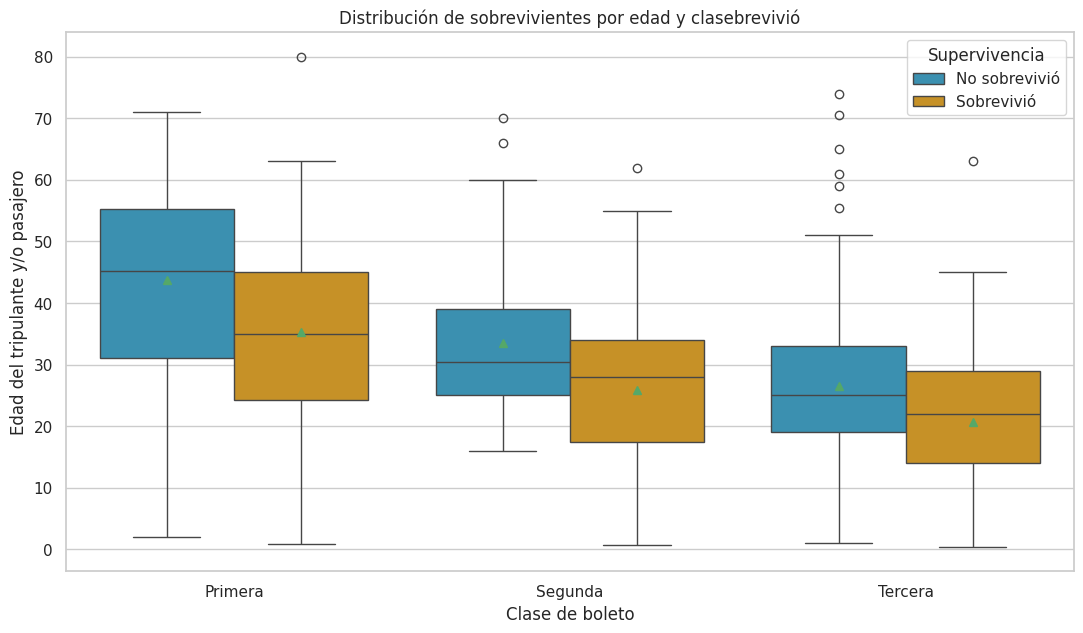

In [ ]:
plt.figure(figsize=(13, 7))
sns.boxplot(df1, x="class_ESP", y="age", hue="alive_ESP",palette=colorslist, showmeans = True)
plt.legend(loc='best',title='Supervivencia')
plt.xlabel("Clase de boleto")
plt.ylabel('Edad del tripulante y/o pasajero')
plt.title("Distribución de sobrevivientes por edad y clasebrevivió")

Se observa que para la primera clase se presenta un rango mucho más amplio, se sobreentiende debido a que las personas con poder adquisitivo tienden a tener una mayor esperanza de vida, esto implca que a medida aumenta la clase disminuye el rango de edades. Como es de esperarse para la tercera clase las edades predominantes (promedio) oscila entre 20 a 30, poder de mano de trabajo.

A partir del boxplot, se observa que para los grupo de sobrevivientes sin importar la clase predominan una superviviencia de jovenes, esto se puede deber a la política de evacuación y a la supervivencia del más fuerte.

##**6. Medidas de tendencia central**
---
1. Calcular el promedio de edad de los pasajeros del Titanic
2. Calcular la mediana de la edad de los pasajeros del Titanic.
3. Calcular el promedio del costo del tiquete de los pasajeros del Titanic
4. Calcular la mediana del costo de los tiquetes de los padajeros del Titanic.
5. Conformar un **diccionario** con los resultados de los puntos 1, 2, 3 y 4.
6. Comparar la media y mediana de cada una de las variables ¿ Tiene sesgo la distribución de estas variables?

In [ ]:
# Escriba aquí el código para calcular las medidas de tendencia central solicitadas

print (f"1. Promedio edad de pasajeros: {np.round(df1['age'].mean(),2)} años")
print (f"2. Mediana edad de pasajeros: {np.round(df1['age'].median(),2)} años")
print (f"3. Promedio costo de tiquete de pasajeros: ${np.round(df1['fare'].mean(),2)} USD")
print (f"4. Mediana costo de tiquete de pasajeros: ${np.round(df1['fare'].median(),2)} USD")

1. Promedio edad de pasajeros: 29.7 años
2. Mediana edad de pasajeros: 28.0 años
3. Promedio costo de tiquete de pasajeros: $32.2 USD
4. Mediana costo de tiquete de pasajeros: $14.45 USD


5. *Diccionario*


| Variable | Definicion       | Naturaleza   | Escala    | Tipo de repsuesta | Promedio | Mediana |
|----------|------------------|--------------|-----------|-------------------|----------|---------|
| Edad     |   Edad en años   | Cuantitativo | Razon |        Discreta           | 29.7     | 28      |
| Fare     | Costo del tiquet | Cuantitativo | Razon     |        Continua           | 32.2     | 14.4    |

6. *Para la variable de "Edad" se observa un sesgo en la derecha, por lo tanto las edades tienden a los valores menores, la variable "costo de tiquet" muestra un sesgo derecho mucho más marcado con una mediana en 14 y media 32.2, con tendencia a los valores menores*

Text(0.5, 1.0, 'Distribución de la edad de los tripulantes y/o pasajeros')

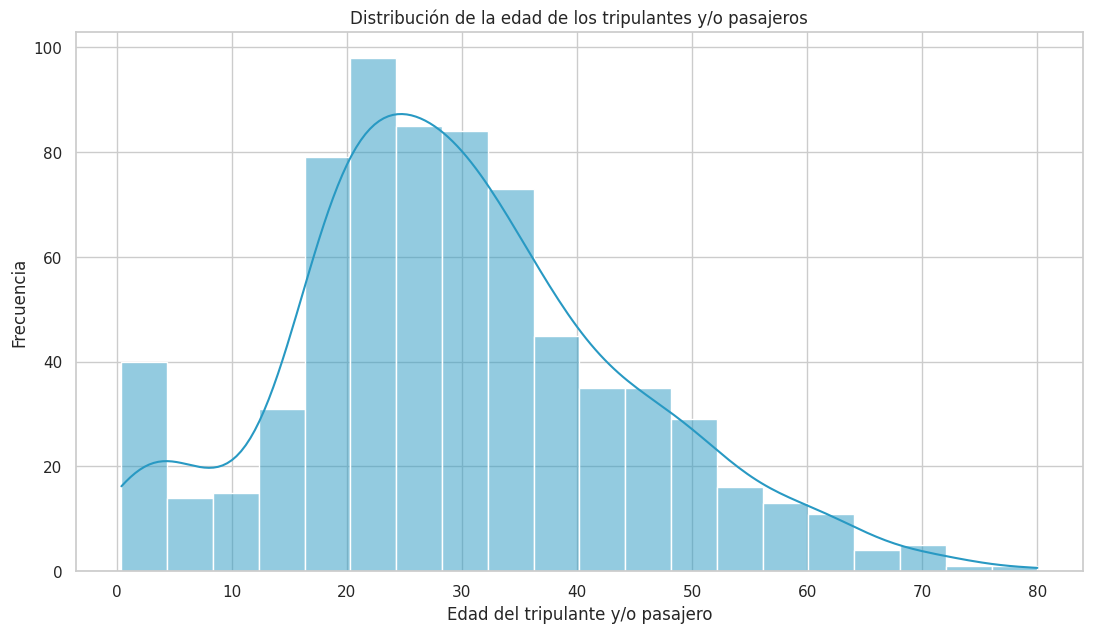

In [ ]:
plt.figure(figsize=(13, 7))
sns.histplot(df1, x="age", kde=True, color=colorslist[0])
plt.xlabel('Edad del tripulante y/o pasajero')
plt.ylabel("Frecuencia")
plt.title("Distribución de la edad de los tripulantes y/o pasajeros")

Text(0.5, 1.0, 'Distribución del valor de la tarifa de los boletos')

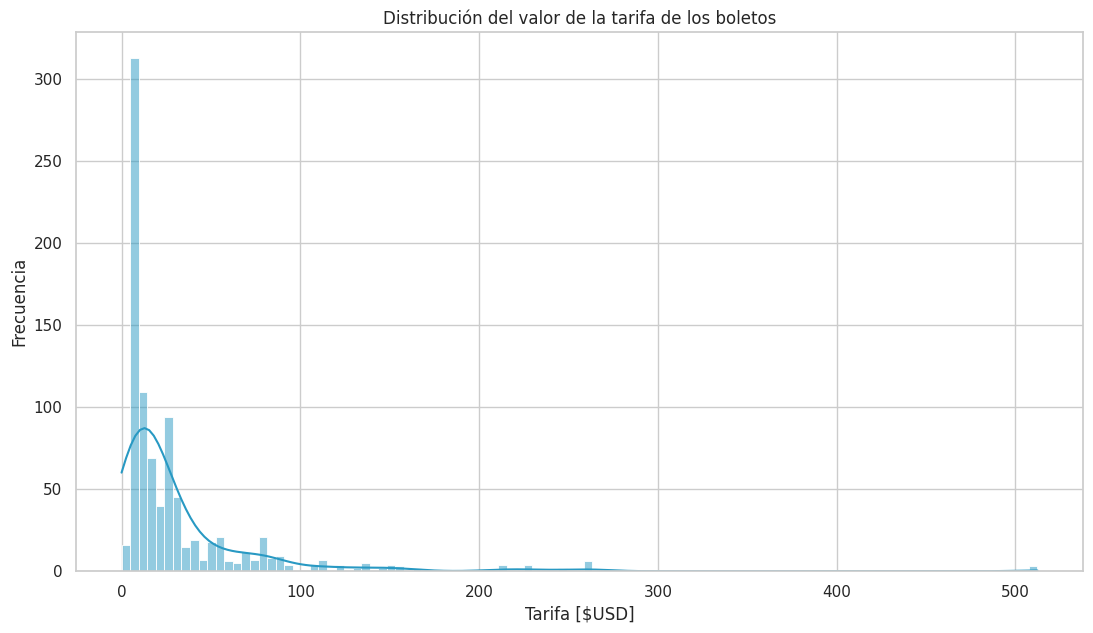

In [ ]:
plt.figure(figsize=(13, 7))
sns.histplot(df1, x="fare", kde=True, color=colorslist[0])
plt.xlabel("Tarifa [$USD]")
plt.ylabel("Frecuencia")
plt.title("Distribución del valor de la tarifa de los boletos")

##**7. Medidas de dispersión**
---
1. Para cada una de las categorías de la variable **pclass** calcule la media y desviación estándar de la variable precio del tiquete (fare).
2. Utilizar los datos hallados en la parte 1 para calcular el coeficiente de variación de la variable precio del tiquete (fare) en cada una de las categorías de la variable **pclass**. Comparar y analizar los resultados.

In [ ]:
# Escriba aquí el código para realizar los cálculos solicitados
df_2 = df1.groupby('pclass')['fare'].agg(['mean', 'std'])
df_2 = df_2.reset_index()
df_2.columns = ['Clase', 'Promedio', 'Desviación estándar']
print("1. promedio y desviación estándar de la variable de clase\n\n")
display(df_2)
print("\n2. Coeficiente de variación estándar \n\n")
display((df_2['Desviación estándar']/df_2['Promedio'])*100)

1. promedio y desviación estándar de la variable de clase




,Clase,Promedio,Desviación estándar
0,1,84.154687,78.380373
1,2,20.662183,13.417399
2,3,13.675550,11.778142



2. Coeficiente de variación estándar 




,0
0,93.138451
1,64.936985
2,86.125542


*A partir de los resultados obtenidos del coeficiente de variación, los resultados obtenidos se encuentran por encima del 30%, esto quiere decir que los datos se encuentran muy dispersos.*

**¡Felicitaciones!** ¡Muy buen trabajo!

## **Entrega**

Para entregar el notebook por favor haga lo siguiente:
1. Descargue el notebook (`Archivo` -> `Descargar .ipynb`).
2. Importelo como archivo HTML.
3. Realice el envío del archivo en la tarea dispuesta en el aula virtual. No olvide escribir los nombres de los integrantes del grupo en el momento de hacer la entrega.


## **Recursos adicionales**
---

Para complemetar sobre el uso de funciones en Python, puede consultar  la [documentación oficial](https://pandas.pydata.org/pandas-docs/stable/reference/index.html), y en especial la [Guía de usuario](https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html) de *pandas*.

Además, a continuación se presenta una lista de recursos adicionales que le podrán ser de utilidad:


*  [Data vedas - Exploración y preparación de los datos](https://www.datavedas.com/data-exploration-and-preparation/)
*  [Kaggle - Pandas](https://www.kaggle.com/learn/pandas)
*  [CodeCademy - Learn Data Analysis with Pandas](https://www.codecademy.com/learn/data-processing-pandas)

* [*Matplotlib*: Visualization with Python](http://www.matplotlib.org)
* [Matplotlib Gallery - (Ejemplos)](http://matplotlib.org/gallery.html) - Se recomienda revisar la galería y ajustar el código de las visualizaciones requeridas.
* [Nicolas P. Rougier - *Matplotlib* tutorial](http://www.labri.fr/perso/nrougier/teaching/matplotlib/)
* [IBM (Coursera) - Data Visualization with *Python*](https://www.coursera.org/learn/python-for-data-visualization)
* [DataCamp - Introduction to Data Visualization with *Matplotlib*](https://www.datacamp.com/courses/introduction-to-matplotlib)